In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine

engine=create_engine(os.environ.get('stbdb_url'))
conn=engine.connect()

In [14]:
sql_query="""
SELECT * FROM telemetry_canadian_race_2024 ORDER BY laps ASC
"""

canadagp_race=pd.read_sql(sql_query,conn)

In [18]:
from datetime import datetime
canadagp_race=canadagp_race[canadagp_race['timestamp']>datetime.strptime('2024-06-09T18:03:30.120Z','%Y-%m-%dT%H:%M:%S.%fZ')]
dedupe=canadagp_race.drop_duplicates(subset=['timestamp','driver_num'])

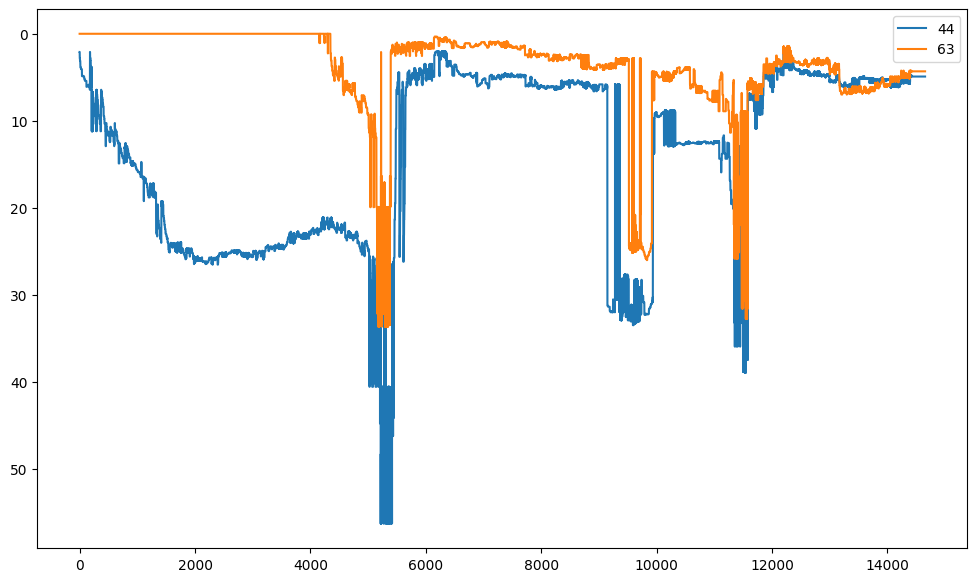

In [61]:
import matplotlib.pyplot as plt
select=dedupe[dedupe['driver_num'].isin([44,63])][['gap_from_leader','lap_pos','laps','driver_num','timestamp']]
select.drop_duplicates(subset=['timestamp','driver_num'],inplace=True)
select['id']=select['laps'].astype(str)+'-'+select['lap_pos'].astype(str)

selgroup=select.groupby('driver_num')
fig,ax=plt.subplots(figsize=(12,7))
for drvNum,group in selgroup:
    gr=group.reset_index(drop=True).reset_index()
    ax.plot(gr['index'],gr['gap_from_leader'],label=drvNum)
ax.invert_yaxis()
ax.legend()


In [62]:
canadagp_race[['driver_num','position','timestamp','status']].sort_values(by=['driver_num','timestamp']).query('status in [0]')[['position']].diff().query('position>0&position<3').count()

position    170
dtype: int64